# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow
tensorflow.__version__

'2.0.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir("/content/drive/My Drive/Face Recognition Project")


### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
files_zip_path = "/content/drive/My Drive/Face Recognition Project/Aligned Face Dataset from Pinterest.zip"

In [0]:
import zipfile
#This extracts the files to the current working directory
archive = zipfile.ZipFile(files_zip_path, 'r')

In [7]:
archive.extractall()
!ls

'Aligned Face Dataset from Pinterest.zip'
'Face recognition - Questions - Project - CV - AIML Online-1.ipynb'
 pins
 PINS
 vgg_face_weights.h5


In [8]:
!ls

'Aligned Face Dataset from Pinterest.zip'
'Face recognition - Questions - Project - CV - AIML Online-1.ipynb'
 pins
 PINS
 vgg_face_weights.h5


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [0]:
img=load_image(metadata[0].image_path())

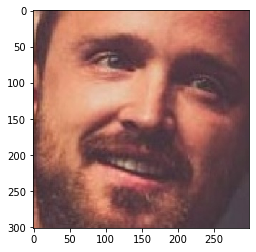

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [14]:
model = vgg_face()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________

In [0]:
#loading the pre-trained weights of vggnet
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)


### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [17]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
embeddings = np.zeros((metadata.shape[0], 2622))

In [19]:
for p,q in enumerate(metadata):
  try:
    img = load_image(q.image_path())
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embeddings[p] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    print(p,q)
  except:
    print(p,q)

0 PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
1 PINS/pins_Aaron Paul/Aaron Paul101_247.jpg
2 PINS/pins_Aaron Paul/Aaron Paul101_248.jpg
3 PINS/pins_Aaron Paul/Aaron Paul101_249.jpg
4 PINS/pins_Aaron Paul/Aaron Paul103_217.jpg
5 PINS/pins_Aaron Paul/Aaron Paul113_228.jpg
6 PINS/pins_Aaron Paul/Aaron Paul114_271.jpg
7 PINS/pins_Aaron Paul/Aaron Paul116_240.jpg
8 PINS/pins_Aaron Paul/Aaron Paul117_213.jpg
9 PINS/pins_Aaron Paul/Aaron Paul119_219.jpg
10 PINS/pins_Aaron Paul/Aaron Paul120_290.jpg
11 PINS/pins_Aaron Paul/Aaron Paul124_221.jpg
12 PINS/pins_Aaron Paul/Aaron Paul126_291.jpg
13 PINS/pins_Aaron Paul/Aaron Paul129_259.jpg
14 PINS/pins_Aaron Paul/Aaron Paul129_260.jpg
15 PINS/pins_Aaron Paul/Aaron Paul130_215.jpg
16 PINS/pins_Aaron Paul/Aaron Paul132_236.jpg
17 PINS/pins_Aaron Paul/Aaron Paul136_225.jpg
18 PINS/pins_Aaron Paul/Aaron Paul137_250.jpg
19 PINS/pins_Aaron Paul/Aaron Paul138_233.jpg
20 PINS/pins_Aaron Paul/Aaron Paul140_243.jpg
21 PINS/pins_Aaron Paul/Aaron Paul145_256.jpg


In [20]:
print(embeddings[10])

[ 4.78936769e-02  2.82074598e-05 -4.65816958e-03 ...  6.49503153e-03
  1.63952739e-03  1.44264288e-02]


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

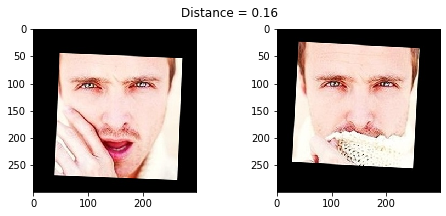

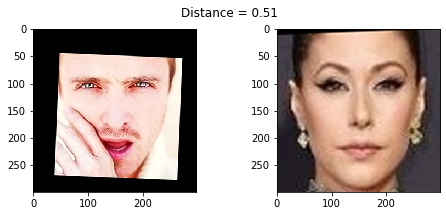

In [22]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

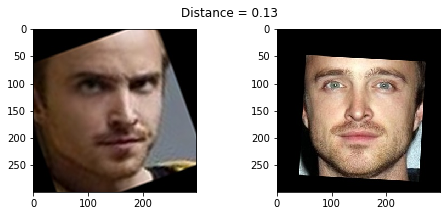

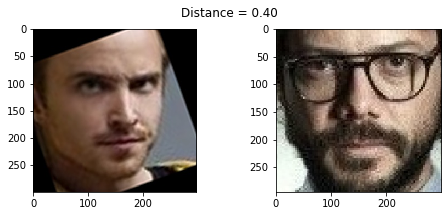

In [23]:
show_pair(30, 31)
show_pair(30, 100)

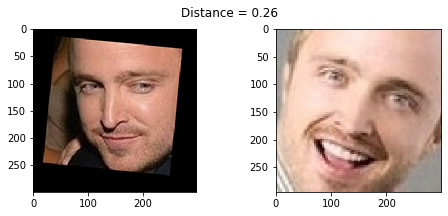

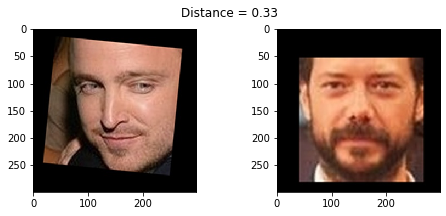

In [24]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

output = np.array([n.name for n in metadata])

#Training set
X_train = embeddings[train_idx]
y_train = output[train_idx]

#Testing set
X_test = embeddings[test_idx]
y_test = output[test_idx]


### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(output)

LabelEncoder()

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Numerical encoding of identities
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [30]:
# Calculating the covariance between attributes after scaling
cov_matrix = np.cov(X_train.T)
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 13.58890703  18.98690264  22.97728235 ...  99.99999983  99.99999999
 100.        ]


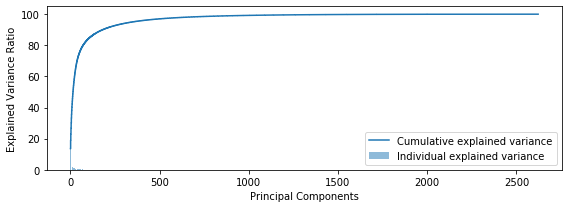

In [31]:
# Ploting 
plt.figure(figsize=(8 , 3))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.decomposition import PCA

# Compute a PCA 
n_components = 370

pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)


# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
model = SVC()

In [31]:
params = {'C': [1000, 5000, 10000, 50000, 100000],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.5, 0.1], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(X_train_pca, y_train)
print("Best Hyper Parameters:\n", model1.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.953, total=  23.8s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.8s remaining:    0.0s


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.948, total=  24.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   48.0s remaining:    0.0s


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.951, total=  24.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.954, total=  27.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.950, total=  27.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.951, total=  27.3s
[CV] C=1000, gamma=0.0005, kernel=linear .............................
[CV] . C=1000, gamma=0.0005, kernel=linear, score=0.953, total=  24.0s
[CV] C=1000, gamma=0.0005, kernel=linear .............................
[CV] . C=1000, gamma=0.0005, kernel=linear, score=0.948, total=  24.0s
[CV] C=1000, gamma=0.0005, kernel=linear .............................
[CV] . C=1000, gamma=0.0005, kernel=linear, score=0.951, total=  24.2s
[CV] C=1000, gamma=0.0005, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0005, kernel=rbf, score=0.957, total=  30.7s
[CV] C=1000, gamma=0.0005, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0005, kernel=rbf, score=0.952, total=  31.1s
[CV] C=1000, gamma=0.0005, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 142.9min finished


Best Hyper Parameters:
 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [35]:
#Build the model with the best hyper parameters
model = SVC(C=1000,gamma=0.001, kernel="rbf")
model.fit(X_train_pca, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, model.predict(X_test_pca))
print("Accuracy using SVC: ",accuracy)

Accuracy using SVC:  0.9649122807017544


In [0]:
y_pred = model.predict(X_test_pca)

In [38]:
print(y_pred)

[ 0  0  0 ... 99 99 99]


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

In [0]:
example_image = load_image(metadata[test_idx][example_idx].image_path())

In [0]:
example_prediction = y_pred

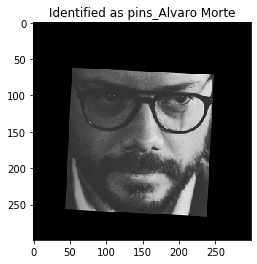

In [63]:
example_identity = encoder.inverse_transform(example_prediction)[example_idx]
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');